In [1]:
# http://portal.inep.gov.br/web/guest/ideb  -- nota média target é 6

In [2]:
#trabalho relacionado
# https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0102-46982016000100133

In [3]:
# tomar cuidado com indicadores que são futuros a nota da prova, como por exemplo taxa de aprovação, reprovação e abandono - não utilizar pois é dado futuro

In [4]:
import pandas as pd
import numpy as np

In [5]:
df_13 = pd.read_csv('gs://bucket-tcc-fia-mba/ABT/ABT_2013.csv', encoding='utf-8', index_col = ['ID_PROVA_BRASIL', 'ID_ESCOLA'])
df_15 = pd.read_csv('gs://bucket-tcc-fia-mba/ABT/ABT_2015.csv', encoding='utf-8', index_col = ['ID_PROVA_BRASIL', 'ID_ESCOLA'])
df_17 = pd.read_csv('gs://bucket-tcc-fia-mba/ABT/ABT_2017.csv', encoding='utf-8', index_col = ['ID_PROVA_BRASIL', 'ID_ESCOLA'])

In [6]:
df_13.head()

ID_UF  ID_MUNICIPIO  ID_DEPENDENCIA_ADM  \
ID_PROVA_BRASIL ID_ESCOLA                                            
2013            11025638      11       1100015                   2   
                11025352      11       1100015                   3   
                11024828      11       1100015                   3   
                11025310      11       1100015                   3   
                11024968      11       1100015                   2   

                           ID_LOCALIZACAO  PC_FORMACAO_DOCENTE_FINAL  \
ID_PROVA_BRASIL ID_ESCOLA                                              
2013            11025638                1                       54.1   
                11025352                2                       34.5   
                11024828                2                       19.7   
                11025310                2                       39.7   
                11024968                1                       38.9   

                          NIVEL_SOCIO_ECONOMICO  NU_MATRICULADOS_CENSO_9EF  \
ID_PROVA_BRASIL ID_ESCOLA                                                    
2013            11025638                Grupo 3                      113.0   
                11025352                Grupo 3                       31.0   
                11024828                Grupo 3                       23.0   
                11025310                Grupo 3                       34.0   
                11024968                Grupo 4                       92.0   

                           NU_PRESENTES_9EF  TAXA_PARTICIPACAO_9EF  \
ID_PROVA_BRASIL ID_ESCOLA                                            
2013            11025638               97.0               0.858407   
                11025352               25.0               0.806452   
                11024828               20.0               0.869565   
                11025310               27.0               0.794118   
                11024968               66.0               0.717391   

                           NIVEL_0_LP9  ...  PROF_MT_TX_RESP_Q116  \
ID_PROVA_BRASIL ID_ESCOLA               ...                         
2013            11025638         33.24  ...                   NaN   
                11025352         31.83  ...                   NaN   
                11024828         30.00  ...                     F   
                11025310         34.61  ...                   NaN   
                11024968         19.64  ...                     A   

                           PROF_MT_TX_RESP_Q117  PROF_MT_TX_RESP_Q118  \
ID_PROVA_BRASIL ID_ESCOLA                                               
2013            11025638                    NaN                   NaN   
                11025352                    NaN                   NaN   
                11024828                      F                     F   
                11025310                    NaN                   NaN   
                11024968                      A                     A   

                           PROF_MT_TX_RESP_Q119  PROF_MT_TX_RESP_Q120  \
ID_PROVA_BRASIL ID_ESCOLA                                               
2013            11025638                    NaN                     E   
                11025352                    NaN                     F   
                11024828                      F                   NaN   
                11025310                    NaN                     E   
                11024968                    NaN                     E   

                           PROF_MT_TX_RESP_Q121  PROF_MT_TX_RESP_Q122  \
ID_PROVA_BRASIL ID_ESCOLA                                               
2013            11025638                      E                     E   
                11025352                      F                     F   
                11024828                    NaN                   NaN   
                11025310                      E                     E   
                11024968                      E

In [7]:
df_15.head()

ID_UF  ID_MUNICIPIO  ID_DEPENDENCIA_ADM  \
ID_PROVA_BRASIL ID_ESCOLA                                            
2015            11025638      11       1100015                   2   
                11024968      11       1100015                   2   
                11007524      11       1100023                   2   
                11006854      11       1100023                   3   
                11007346      11       1100023                   3   

                           ID_LOCALIZACAO  PC_FORMACAO_DOCENTE_FINAL  \
ID_PROVA_BRASIL ID_ESCOLA                                              
2015            11025638                1                       64.0   
                11024968                1                       51.5   
                11007524                1                       66.0   
                11006854                1                       54.0   
                11007346                2                       39.1   

                          NIVEL_SOCIO_ECONOMICO  NU_MATRICULADOS_CENSO_9EF  \
ID_PROVA_BRASIL ID_ESCOLA                                                    
2015            11025638                  Médio                       90.0   
                11024968             Médio Alto                       53.0   
                11007524             Médio Alto                      102.0   
                11006854                  Médio                       28.0   
                11007346                  Médio                       24.0   

                           NU_PRESENTES_9EF  TAXA_PARTICIPACAO_9EF  \
ID_PROVA_BRASIL ID_ESCOLA                                            
2015            11025638               73.0               0.811111   
                11024968               39.0               0.735849   
                11007524               87.0               0.852941   
                11006854               29.0               1.035714   
                11007346               22.0               0.916667   

                           NIVEL_0_LP9  ...  PROF_MT_TX_RESP_Q116  \
ID_PROVA_BRASIL ID_ESCOLA               ...                         
2015            11025638         24.68  ...                   NaN   
                11024968          2.98  ...                   NaN   
                11007524          7.23  ...                   NaN   
                11006854          0.00  ...                   NaN   
                11007346         13.64  ...                   NaN   

                           PROF_MT_TX_RESP_Q117  PROF_MT_TX_RESP_Q118  \
ID_PROVA_BRASIL ID_ESCOLA                                               
2015            11025638                    NaN                   NaN   
                11024968                    NaN                   NaN   
                11007524                    NaN                   NaN   
                11006854                    NaN                   NaN   
                11007346                    NaN                   NaN   

                           PROF_MT_TX_RESP_Q119  PROF_MT_TX_RESP_Q120  \
ID_PROVA_BRASIL ID_ESCOLA                                               
2015            11025638                    NaN                     F   
                11024968                    NaN                   NaN   
                11007524                    NaN                     F   
                11006854                    NaN                     F   
                11007346                    NaN                   NaN   

                           PROF_MT_TX_RESP_Q121  PROF_MT_TX_RESP_Q122  \
ID_PROVA_BRASIL ID_ESCOLA                                               
2015            11025638                      F                     F   
                11024968                    NaN                   NaN   
                11007524                      F                     F   
                11006854                      F                     F   
                11007346                    NaN

In [8]:
df_17.head()

ID_UF  ID_MUNICIPIO  ID_DEPENDENCIA_ADM  \
ID_PROVA_BRASIL ID_ESCOLA                                            
2017            11024666      11       1100015                   3   
                11024828      11       1100015                   3   
                11024968      11       1100015                   2   
                11025077      11       1100015                   3   
                11025310      11       1100015                   3   

                           ID_LOCALIZACAO  PC_FORMACAO_DOCENTE_FINAL  \
ID_PROVA_BRASIL ID_ESCOLA                                              
2017            11024666                2                       55.6   
                11024828                1                       55.6   
                11024968                1                       48.9   
                11025077                1                       55.6   
                11025310                1                       63.9   

                          NIVEL_SOCIO_ECONOMICO  NU_MATRICULADOS_CENSO_9EF  \
ID_PROVA_BRASIL ID_ESCOLA                                                    
2017            11024666                Grupo 2                       18.0   
                11024828                Grupo 3                       17.0   
                11024968                Grupo 3                       86.0   
                11025077                    NaN                       11.0   
                11025310                    NaN                       25.0   

                           NU_PRESENTES_9EF  TAXA_PARTICIPACAO_9EF  \
ID_PROVA_BRASIL ID_ESCOLA                                            
2017            11024666               16.0               0.888889   
                11024828               17.0               1.000000   
                11024968               83.0               0.965116   
                11025077               10.0               0.909091   
                11025310               21.0               0.840000   

                           NIVEL_0_LP9  ...  PROF_MT_TX_RESP_Q116  \
ID_PROVA_BRASIL ID_ESCOLA               ...                         
2017            11024666          0.00  ...                   NaN   
                11024828          5.88  ...                     C   
                11024968          9.65  ...                     A   
                11025077         10.00  ...                   NaN   
                11025310          9.52  ...                   NaN   

                           PROF_MT_TX_RESP_Q117  PROF_MT_TX_RESP_Q118  \
ID_PROVA_BRASIL ID_ESCOLA                                               
2017            11024666                    NaN                   NaN   
                11024828                      A                     A   
                11024968                      A                     A   
                11025077                    NaN                   NaN   
                11025310                    NaN                   NaN   

                           PROF_MT_TX_RESP_Q119  PROF_MT_TX_RESP_Q120  \
ID_PROVA_BRASIL ID_ESCOLA                                               
2017            11024666                    NaN                   NaN   
                11024828                      A                     F   
                11024968                      B                     B   
                11025077                    NaN                   NaN   
                11025310                    NaN                   NaN   

                           PROF_MT_TX_RESP_Q121  PROF_MT_TX_RESP_Q122  \
ID_PROVA_BRASIL ID_ESCOLA                                               
2017            11024666                    NaN                   NaN   
                11024828                      F                     F   
                11024968                      F                     F   
                11025077                    NaN                   NaN   
                11025310                    NaN

In [9]:
df_17.groupby('NIVEL_SOCIO_ECONOMICO')['NIVEL_SOCIO_ECONOMICO'].count()

NIVEL_SOCIO_ECONOMICO
Grupo 1     1723
Grupo 2     5488
Grupo 3    13463
Grupo 4     8918
Grupo 5     1715
Grupo 6       18
Name: NIVEL_SOCIO_ECONOMICO, dtype: int64

In [10]:
df_13.groupby('NIVEL_SOCIO_ECONOMICO')['NIVEL_SOCIO_ECONOMICO'].count()

NIVEL_SOCIO_ECONOMICO
Grupo 1    1137
Grupo 2    3312
Grupo 3    6690
Grupo 4    9989
Grupo 5    9481
Grupo 6    1064
Grupo 7      16
Name: NIVEL_SOCIO_ECONOMICO, dtype: int64

In [11]:
df_15.groupby('NIVEL_SOCIO_ECONOMICO')['NIVEL_SOCIO_ECONOMICO'].count()

NIVEL_SOCIO_ECONOMICO
Alto            2828
Baixo           2428
Muito Alto        56
Muito Baixo      280
Médio           7583
Médio Alto     10122
Médio Baixo     6131
Name: NIVEL_SOCIO_ECONOMICO, dtype: int64

In [12]:
nivel = {
    'Muito Baixo': 'Grupo 1',  
    'Baixo': 'Grupo 2',
    'Médio Baixo': 'Grupo 3',
    'Médio': 'Grupo 4', 
    'Médio Alto': 'Grupo 5',
    'Alto': 'Grupo 6' ,
    'Muito Alto': 'Grupo 7'}

In [13]:
nivel

{'Muito Baixo': 'Grupo 1',
 'Baixo': 'Grupo 2',
 'Médio Baixo': 'Grupo 3',
 'Médio': 'Grupo 4',
 'Médio Alto': 'Grupo 5',
 'Alto': 'Grupo 6',
 'Muito Alto': 'Grupo 7'}

In [14]:
df_15['NIVEL_SOCIO_ECONOMICO'].replace(to_replace=nivel, value=None, inplace=True)

In [15]:
df_15.groupby('NIVEL_SOCIO_ECONOMICO')['NIVEL_SOCIO_ECONOMICO'].count()

NIVEL_SOCIO_ECONOMICO
Grupo 1      280
Grupo 2     2428
Grupo 3     6131
Grupo 4     7583
Grupo 5    10122
Grupo 6     2828
Grupo 7       56
Name: NIVEL_SOCIO_ECONOMICO, dtype: int64

A variável NIVEL_SOCIO_ECONOMICO está com distribuições diferentes entre as referências das bases de dados.
No ano de 2017 ela apresenta apenas 6 grupos, e nos demais 7 grupos, sendo que o Grupo 1 está com distrubuições muito diferentes entre os anos. 

Text(0, 0.5, 'Quantidade de escolas')

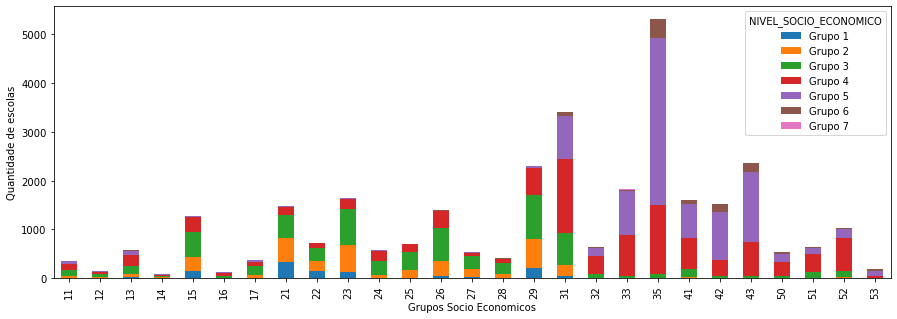

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
df_13.groupby(['ID_UF','NIVEL_SOCIO_ECONOMICO'])['ID_UF'].count().unstack().plot(kind='bar',stacked =True,ax=ax)
ax.set_xlabel('Grupos Socio Economicos')
ax.set_ylabel('Quantidade de escolas')

Text(0, 0.5, 'Quantidade de escolas')

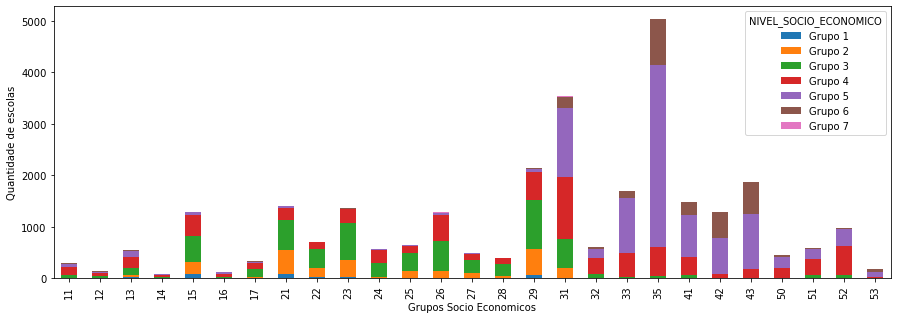

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
df_15.groupby(['ID_UF','NIVEL_SOCIO_ECONOMICO'])['ID_UF'].count().unstack().plot(kind='bar',stacked =True,ax=ax)
ax.set_xlabel('Grupos Socio Economicos')
ax.set_ylabel('Quantidade de escolas')

Text(0, 0.5, 'Quantidade de escolas')

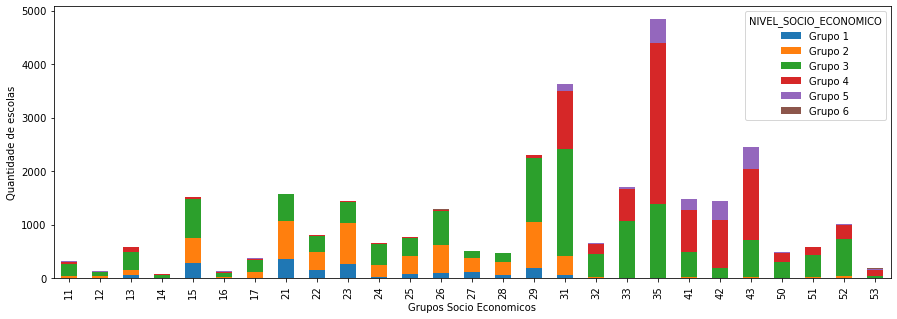

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
df_17.groupby(['ID_UF','NIVEL_SOCIO_ECONOMICO'])['ID_UF'].count().unstack().plot(kind='bar',stacked =True,ax=ax)
ax.set_xlabel('Grupos Socio Economicos')
ax.set_ylabel('Quantidade de escolas')

Esse dados podem distorcer a análise, portanto não irei utilizá-los.

### Criando as variáveis target

In [19]:
df = pd.concat([df_13, df_15, df_17],axis=0)

In [20]:
df.shape

(98992, 459)

In [21]:
with pd.option_context("display.max_rows", 50, "display.max_columns", 500):
    display(df.head())

ID_UF  ID_MUNICIPIO  ID_DEPENDENCIA_ADM  \
ID_PROVA_BRASIL ID_ESCOLA                                            
2013            11025638      11       1100015                   2   
                11025352      11       1100015                   3   
                11024828      11       1100015                   3   
                11025310      11       1100015                   3   
                11024968      11       1100015                   2   

                           ID_LOCALIZACAO  PC_FORMACAO_DOCENTE_FINAL  \
ID_PROVA_BRASIL ID_ESCOLA                                              
2013            11025638                1                       54.1   
                11025352                2                       34.5   
                11024828                2                       19.7   
                11025310                2                       39.7   
                11024968                1                       38.9   

                          NIVEL_SOCIO_ECONOMICO  NU_MATRICULADOS_CENSO_9EF  \
ID_PROVA_BRASIL ID_ESCOLA                                                    
2013            11025638                Grupo 3                      113.0   
                11025352                Grupo 3                       31.0   
                11024828                Grupo 3                       23.0   
                11025310                Grupo 3                       34.0   
                11024968                Grupo 4                       92.0   

                           NU_PRESENTES_9EF  TAXA_PARTICIPACAO_9EF  \
ID_PROVA_BRASIL ID_ESCOLA                                            
2013            11025638               97.0               0.858407   
                11025352               25.0               0.806452   
                11024828               20.0               0.869565   
                11025310               27.0               0.794118   
                11024968               66.0               0.717391   

                           NIVEL_0_LP9  NIVEL_1_LP9  NIVEL_2_LP9  NIVEL_3_LP9  \
ID_PROVA_BRASIL ID_ESCOLA                                                       
2013            11025638         33.24        12.14        15.36        16.78   
                11025352         31.83        20.00        23.66        16.34   
                11024828         30.00        25.00         5.00        30.00   
                11025310         34.61        21.37        28.92        10.69   
                11024968         19.64        15.19        18.36        19.99   

                           NIVEL_4_LP9  NIVEL_5_LP9  NIVEL_6_LP9  NIVEL_7_LP9  \
ID_PROVA_BRASIL ID_ESCOLA                                                       
2013            11025638         13.16         7.22         2.09         0.00   
                11025352          4.52         3.66         0.00         0.00   
                11024828          5.00         5.00         0.00         0.00   
                11025310          0.00         4.41         0.00         0.00   
                11024968         17.91         4.44         3.05         1.42   

                           NIVEL_8_LP9  NIVEL_0_MT9  NIVEL_1_MT9  NIVEL_2_MT9  \
ID_PROVA_BRASIL ID_ESCOLA                                                       
2013            11025638           0.0        18.78        17.45        17.58   
                11025352           0.0        17.20         8.17        27.31   
                11024828           0.0        35.00        15.00         5.00   
                11025310           0.0        44.71        10.69        12.55   
                11024968           0.0        10.96        13.23        27.15   

                           NIVEL_3_MT9  NIVEL_4_MT9  NIVEL_5_MT9  NIVEL_6_MT9  \
ID_PROVA_BRASIL ID_ESCOLA                                                       
2013            11025638         24.62        16.49         1.98         2.03   
                11025352         35.48        

In [22]:
df_bkp = df.copy()

O aprendizado adequado segue a seguinte regra:

Matemática 9º: > 300 ou nível 5 a 9

Língua Portuguesa 9º: > 275 ou nível 4 a 8.

Abaixo criaremos as variáveis que terão as targets de 'aprendizado adequado' de cada disciplina de acordo com as regras definidas acima.

In [23]:
df['NVL_5a9_MT9'] =  df['NIVEL_5_MT9']+df['NIVEL_6_MT9']+df['NIVEL_7_MT9']+df['NIVEL_8_MT9']+df['NIVEL_9_MT9']
df['ADQ_NVL_MT9'] =  df['NVL_5a9_MT9'].apply(lambda x: 1 if x>50 else 0)
df['ADQ_MED_MT9'] =  df['MEDIA_9EF_MT'].apply(lambda x: 1 if x>300 else 0)

df['NVL_4a8_LP9'] =  df['NIVEL_4_LP9']+df['NIVEL_5_LP9']+df['NIVEL_6_LP9']+df['NIVEL_7_LP9']+df['NIVEL_8_LP9']
df['ADQ_NVL_LP9'] =  df['NVL_4a8_LP9'].apply(lambda x: 1 if x>50 else 0)
df['ADQ_MED_LP9'] = df['MEDIA_9EF_LP'].apply(lambda x: 1 if x>275 else 0)

In [24]:
#verifica se existem escolas com nota adequadas mas percentual inadequado
display(df[(df['ADQ_MED_MT9']==1) & (df['ADQ_NVL_MT9']!=1)]
        [['NVL_4a8_LP9','ADQ_NVL_LP9','MEDIA_9EF_LP', 'ADQ_MED_LP9', 'NVL_5a9_MT9', 'ADQ_NVL_MT9', 'MEDIA_9EF_MT', 'ADQ_MED_MT9']].head())

NVL_4a8_LP9  ADQ_NVL_LP9  MEDIA_9EF_LP  \
ID_PROVA_BRASIL ID_ESCOLA                                           
2013            23169788         71.43            1        288.58   
                23008830         62.50            1        290.95   
                29443814         77.07            1        295.44   
                31171468         63.24            1        287.11   
                31277886         68.55            1        291.61   

                           ADQ_MED_LP9  NVL_5a9_MT9  ADQ_NVL_MT9  \
ID_PROVA_BRASIL ID_ESCOLA                                          
2013            23169788             1        47.63            0   
                23008830             1        45.84            0   
                29443814             1        50.00            0   
                31171468             1        47.23            0   
                31277886             1        48.34            0   

                           MEDIA_9EF_MT  ADQ_MED_MT9  
ID_PROVA_BRASIL ID_ESCOLA                             
2013            23169788         304.22            1  
                23008830         302.26            1  
                29443814         304.44            1  
                31171468         300.98            1  
                31277886         303.56            1

In [25]:
#analisando ano a ano as divergencias entre aprendizado adequado por nível e por nota
df.groupby(['ID_PROVA_BRASIL', 'ADQ_NVL_LP9', 'ADQ_MED_LP9'])['ID_UF'].count()

ID_PROVA_BRASIL  ADQ_NVL_LP9  ADQ_MED_LP9
2013             0            0              30157
                              1                 67
                 1            0                496
                              1               1056
2015             0            0              27382
                              1                140
                 1            0                908
                              1               1731
2017             0            0              31117
                              1                353
                 1            0               1689
                              1               3896
Name: ID_UF, dtype: int64

Pensei em três possibilidades de análise das variáveis target para o estudo de aprendizagem adequada:
* Verificar se o valor médio das notas de português ou matemática estão dentro do valor considerado adequado pela QEdu.
* Somar o percentual de alunos nos níveis de aprendizado adequado e considerar como adequado (1) quando for superior a 50%.
* Combinar as duas metodologias.

Claramente na analise acima é possível ver que existem escolas com média de aprendizagem adequada porém não tem mais de 50% dos alunos com aprendizagem adequada, o que indica possíveis outliers. Alunos muito bons puxando a média para cima.

Por outro lado, me questiono o que faria a escola estar adequada em percentual, mas na média não? Talvez outliers também, porém do outro extremo: alunos com notas muito ruins.

Tendo a considerar a terceira opção por ser a mais abrangente no nível escola, que é o que estou avaliando.

Avaliando o % de escolas com aprendizagem adequada a cada ano e também o total de escolas disponíveis na avaliação é possível ver que houve um aumento no ano de 2017, o que indica possível entrada de escolas diferentes com nível de aprendizagem mais alto, talvez escolas particulares. Irei avaliar a seguir.

In [26]:
df['ADQ_LP9'] =  df['ADQ_MED_LP9']+df['ADQ_NVL_LP9']
df['ADQ_MT9'] =  df['ADQ_MED_MT9']+df['ADQ_NVL_MT9']


df['TARGET_LP9'] =  df['ADQ_LP9'].apply(lambda x: 1 if x>0 else 0)
df['TARGET_MT9'] =  df['ADQ_MT9'].apply(lambda x: 1 if x>0 else 0)

In [27]:
df.groupby(['ID_PROVA_BRASIL', 'TARGET_LP9'])['TARGET_LP9'].count()

ID_PROVA_BRASIL  TARGET_LP9
2013             0             30157
                 1              1619
2015             0             27382
                 1              2779
2017             0             31117
                 1              5938
Name: TARGET_LP9, dtype: int64

In [28]:
df.groupby(['ID_PROVA_BRASIL', 'TARGET_MT9'])['TARGET_MT9'].count()

ID_PROVA_BRASIL  TARGET_MT9
2013             0             31371
                 1               405
2015             0             29756
                 1               405
2017             0             36215
                 1               840
Name: TARGET_MT9, dtype: int64

In [29]:
df.groupby(['ID_PROVA_BRASIL'])['TARGET_MT9'].count()

ID_PROVA_BRASIL
2013    31776
2015    30161
2017    37055
Name: TARGET_MT9, dtype: int64

##### Analisando as melhores e piores escolas por nota e disciplina

In [30]:
# top 5
top5_lp = df.sort_values(by='MEDIA_9EF_LP', ascending=False).head(5)
top5_mt = df.sort_values(by='MEDIA_9EF_MT', ascending=False).head(5)

In [31]:
#worst 5
#existem alguns municipios ficticios na base de dados (não entendi o motivo), mas eles são definidos por estes códigos iniciados por 6
worst5_lp = df[df['ID_MUNICIPIO']<6000000].sort_values(by='MEDIA_9EF_LP', ascending=True).head(5)
worst5_mt = df[df['ID_MUNICIPIO']<6000000].sort_values(by='MEDIA_9EF_MT', ascending=True).head(5)

In [32]:
top5_lp['BASE']='TOP_LP'
top5_mt['BASE']='TOP_MT'
worst5_lp['BASE']='WORST_LP'
worst5_mt['BASE']='WORST_MT'

In [33]:
top_worst = pd.concat([top5_lp, top5_mt, worst5_lp, worst5_mt],axis=0)
top_worst.reset_index(inplace=True)
top_worst

,ID_PROVA_BRASIL,ID_ESCOLA,ID_UF,ID_MUNICIPIO,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,PC_FORMACAO_DOCENTE_FINAL,NIVEL_SOCIO_ECONOMICO,NU_MATRICULADOS_CENSO_9EF,NU_PRESENTES_9EF,...,ADQ_NVL_MT9,ADQ_MED_MT9,NVL_4a8_LP9,ADQ_NVL_LP9,ADQ_MED_LP9,ADQ_LP9,ADQ_MT9,TARGET_LP9,TARGET_MT9,BASE
0,2017,26124297,26,2611606,1,1,95.3,Grupo 6,60.0,57.0,...,1,1,98.15,1,1,2,2,1,1,TOP_LP
1,2017,23102390,23,2311405,3,1,18.3,Grupo 3,66.0,68.0,...,1,1,94.11,1,1,2,2,1,1,TOP_LP
2,2017,26119730,26,2611606,2,1,69.4,Grupo 6,31.0,30.0,...,1,1,96.66,1,1,2,2,1,1,TOP_LP
3,2013,26124297,26,2611606,1,1,79.2,Grupo 6,60.0,56.0,...,1,1,98.22,1,1,2,2,1,1,TOP_LP
4,2015,26119730,26,2611606,2,1,52.5,Grupo 7,40.0,39.0,...,1,1,100.00,1,1,2,2,1,1,TOP_LP
5,2013,23170069,23,2302503,3,2,40.5,Grupo 2,20.0,20.0,...,1,1,70.00,1,1,2,2,1,1,TOP_MT
6,2017,23026340,23,2312908,3,2,44.4,NaN,18.0,18.0,...,1,1,100.00,1,1,2,2,1,1,TOP_MT
7,2015,26124297,26,2611606,1,1,96.3,Grupo 7,57.0,54.0,...,1,1,96.29,1,1,2,2,1,1,TOP_MT
8,2017,23005025,23,2304707,3,2,22.2,NaN,16.0,15.0,...,1,1,93.34,1,1,2,2,1,1,TOP_MT
9,2015,23213434,23,2302503,3,1,7.4,Grupo 3,33.0,32.0,...,1,1,87.50,1,1,2,2,1,1,TOP_MT


In [34]:
tb_municipios = pd.read_csv('gs://bucket-tcc-fia-mba/RELATORIO_DTB_BRASIL_MUNICIPIO.csv', sep = ';', encoding='utf-8')

In [35]:
top_worst2 = pd.merge(top_worst, tb_municipios[['Nome_Município','Código Município Completo','Nome_Mesorregião', 'Nome_UF']], how='left', left_on=['ID_MUNICIPIO'], right_on=['Código Município Completo']).drop(columns=['Código Município Completo'])

In [36]:
top_worst2

,ID_PROVA_BRASIL,ID_ESCOLA,ID_UF,ID_MUNICIPIO,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,PC_FORMACAO_DOCENTE_FINAL,NIVEL_SOCIO_ECONOMICO,NU_MATRICULADOS_CENSO_9EF,NU_PRESENTES_9EF,...,ADQ_NVL_LP9,ADQ_MED_LP9,ADQ_LP9,ADQ_MT9,TARGET_LP9,TARGET_MT9,BASE,Nome_Município,Nome_Mesorregião,Nome_UF
0,2017,26124297,26,2611606,1,1,95.3,Grupo 6,60.0,57.0,...,1,1,2,2,1,1,TOP_LP,Recife,Metropolitana de Recife,Pernambuco
1,2017,23102390,23,2311405,3,1,18.3,Grupo 3,66.0,68.0,...,1,1,2,2,1,1,TOP_LP,Quixeramobim,Sertões Cearenses,Ceará
2,2017,26119730,26,2611606,2,1,69.4,Grupo 6,31.0,30.0,...,1,1,2,2,1,1,TOP_LP,Recife,Metropolitana de Recife,Pernambuco
3,2013,26124297,26,2611606,1,1,79.2,Grupo 6,60.0,56.0,...,1,1,2,2,1,1,TOP_LP,Recife,Metropolitana de Recife,Pernambuco
4,2015,26119730,26,2611606,2,1,52.5,Grupo 7,40.0,39.0,...,1,1,2,2,1,1,TOP_LP,Recife,Metropolitana de Recife,Pernambuco
5,2013,23170069,23,2302503,3,2,40.5,Grupo 2,20.0,20.0,...,1,1,2,2,1,1,TOP_MT,Brejo Santo,Sul Cearense,Ceará
6,2017,23026340,23,2312908,3,2,44.4,NaN,18.0,18.0,...,1,1,2,2,1,1,TOP_MT,Sobral,Noroeste Cearense,Ceará
7,2015,26124297,26,2611606,1,1,96.3,Grupo 7,57.0,54.0,...,1,1,2,2,1,1,TOP_MT,Recife,Metropolitana de Recife,Pernambuco
8,2017,23005025,23,2304707,3,2,22.2,NaN,16.0,15.0,...,1,1,2,2,1,1,TOP_MT,Granja,Noroeste Cearense,Ceará
9,2015,23213434,23,2302503,3,1,7.4,Grupo 3,33.0,32.0,...,1,1,2,2,1,1,TOP_MT,Brejo Santo,Sul Cearense,Ceará


In [37]:
top_worst2.to_csv('gs://bucket-tcc-fia-mba/ABT/TOP_BOTTOM.csv', sep=';')

In [38]:
df[df['ID_MUNICIPIO']>6000000]['ID_UF'].count()/len(df)

0.012687893971229998

Removendo as variáveis temporárias que foram utilizadas para criar as targets e que não serão mais utilizadas

In [39]:
colunas_drop = ['ADQ_LP9', 'ADQ_MT9', 'ADQ_NVL_LP9', 'ADQ_NVL_MT9', 'ADQ_MED_LP9', 'ADQ_MED_MT9']

In [40]:
df.drop(columns=colunas_drop, inplace=True)

In [41]:
df.shape

(98992, 463)

Removendo as variáveis de nível que foram utilizadas para criar as targets e serão removidas para não influenciar o resultado do modelo

In [42]:
colunas_drop = ['NVL_5a9_MT9','NIVEL_0_MT9','NIVEL_1_MT9','NIVEL_2_MT9','NIVEL_3_MT9','NIVEL_4_MT9','NIVEL_5_MT9','NIVEL_6_MT9','NIVEL_7_MT9','NIVEL_8_MT9','NIVEL_9_MT9','MEDIA_9EF_MT',
                'NVL_4a8_LP9','NIVEL_0_LP9','NIVEL_1_LP9','NIVEL_2_LP9','NIVEL_3_LP9','NIVEL_4_LP9','NIVEL_5_LP9','NIVEL_6_LP9','NIVEL_7_LP9','NIVEL_8_LP9','MEDIA_9EF_LP']

In [43]:
df.drop(columns=colunas_drop, inplace=True)
df.shape

(98992, 440)

Grava base final no Storage.

In [44]:
df.to_csv('gs://bucket-tcc-fia-mba/ABT/ABT_TARGET.csv')